In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Loading the data
data_file = "visitor_data_clickstream.csv"
data_file_delimiter = ','

# Column count
largest_column_count = 0
with open(data_file, 'r') as temp_f:
    lines = temp_f.readlines()
    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (0, 1, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
visitor_data = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
visitor_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,linkedin_share,android,blog_1,home,pricing,purchase_start,purchase_enter_address,purchase_success,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,facebook_share,ios,blog_1,pricing,purchase_start,blog_1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,search,android,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,facebook_share,windows,blog_2,home,blog_1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,facebook_share,ios,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
visitor_data.rename(columns={0:'source', 1:'platform'}, inplace=True)
visitor_data.head()

,source,platform,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,linkedin_share,android,blog_1,home,pricing,purchase_start,purchase_enter_address,purchase_success,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,facebook_share,ios,blog_1,pricing,purchase_start,blog_1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,search,android,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,facebook_share,windows,blog_2,home,blog_1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,facebook_share,ios,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Do the three campaigns perform differently, and what could these differences mean? 

In [111]:
to_remove = ['platform']
def remove_columns(dataset, to_remove):
    sources = dataset.copy()   
    sources = dataset.drop(to_remove, axis=1)  
    return sources

sources_only = remove_columns(visitor_data, to_remove)
sources_only.head()

,source,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,linkedin_share,blog_1,home,pricing,purchase_start,purchase_enter_address,purchase_success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,facebook_share,blog_1,pricing,purchase_start,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,search,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,facebook_share,blog_2,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,facebook_share,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
sources = sources_only['source'].unique().tolist()
sources

['linkedin_share',
 'facebook_share',
 'search',
 'direct',
 'partner_advert',
 'facebook_advert',
 'linkedin_advert']

In [113]:
linkedin_share = sources_only.loc[sources_only['source'] == "linkedin_share"]
facebook_share = sources_only.loc[sources_only['source'] == "facebook_share"]
search = sources_only.loc[sources_only['source'] == "search"]
direct = sources_only.loc[sources_only['source'] == "direct"]
partner_advert = sources_only.loc[sources_only['source'] == "partner_advert"]
facebook_advert = sources_only.loc[sources_only['source'] == "facebook_advert"]
linkedin_advert = sources_only.loc[sources_only['source'] == "linkedin_advert"]

In [114]:
def get_bounce_rate(dataset):
    count = dataset.count(axis=1)
    move_count = count.value_counts()
    move_count = pd.DataFrame(data=move_count)
    if 2 in move_count.index.tolist():
        bounce_rate = move_count[0][2] / move_count[0].sum()
    else:
        bounce_rate = 0
    return round(bounce_rate,2)

In [115]:
source_list = [linkedin_share, facebook_share, search, direct, partner_advert, facebook_advert, linkedin_advert]
bounces = []
for source in source_list:
    source = source.reset_index(drop=True)
    bounces.append(round(get_bounce_rate(source),2))
bounces

[0.2, 0.16, 0.18, 0.1, 0, 0.43, 0]

In [116]:
def get_conversion(dataset):
    dataset1 = dataset.reset_index(drop=True)
    columns = list(dataset1.columns)
    rows = list(range(0,len(dataset1)))
    successes = []
    for column in columns:
        if dataset1[dataset1[column] == 'purchase_success'].shape[0] > 0:
            successes.append(dataset1[dataset1[column] == 'purchase_success'].shape[0])
    conversion = sum(successes)/len(rows)
    return round(conversion, 2)

In [117]:
conversions = []
for source in source_list:
    source = source.reset_index(drop=True)
    conversions.append(get_conversion(source))
conversions

[0.12, 0.13, 0.15, 0.32, 0.11, 0.01, 0.25]

In [118]:
def get_avg_length(dataset):
    lengths = dataset.count(axis=1).to_frame()
    avg_length = round(lengths[0].sum()/len(lengths),0)
    return avg_length

In [119]:
avg_lengths = []
for source in source_list:
    source = source.reset_index(drop=True)
    avg_lengths.append(get_avg_length(source))
avg_lengths

[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0]

In [120]:
d = {'Source': sources, 'Bounce': bounces, 'Conversion': conversions, 'Avg Visited Pages': avg_lengths}
df = pd.DataFrame(data=d)
df

,Source,Bounce,Conversion,Avg Visited Pages
0,linkedin_share,0.20,0.12,4.0
1,facebook_share,0.16,0.13,4.0
2,search,0.18,0.15,4.0
3,direct,0.10,0.32,5.0
4,partner_advert,0.00,0.11,5.0
5,facebook_advert,0.43,0.01,3.0
6,linkedin_advert,0.00,0.25,5.0


In [121]:
df.drop(labels=[4,5,6], axis=0)

,Source,Bounce,Conversion,Avg Visited Pages
0,linkedin_share,0.20,0.12,4.0
1,facebook_share,0.16,0.13,4.0
2,search,0.18,0.15,4.0
3,direct,0.10,0.32,5.0


Do the users from different platforms behave differently? There were concerns that
some platforms struggled at a particular stage of the process, can you find these
stages?

In [122]:
platforms = visitor_data['platform'].unique().tolist()
platforms

['android', 'ios', 'windows', 'unknown', 'mac']

In [123]:
android_people = visitor_data.loc[visitor_data['platform'] == "android"] 
ios_people = visitor_data.loc[visitor_data['platform'] == "ios"]
windows_people = visitor_data.loc[visitor_data['platform'] == "windows"]
mac_people = visitor_data.loc[visitor_data['platform'] == "mac"]
unknown_people = visitor_data.loc[visitor_data['platform'] == "unknown"]

platform_groups = [android_people, ios_people, windows_people, mac_people, unknown_people]

In [124]:
def get_dropouts(platform_group):
    start_purchase = platform_group[(platform_group == 'purchase_start').any(axis=1)]
    success_purchase = platform_group[(platform_group == 'purchase_success').any(axis=1)]
    dropout = 1-(len(success_purchase)/len(start_purchase))
    return round(dropout*100,2)

In [125]:
dropouts = []
for platform_group in platform_groups:
    dropouts.append(get_dropouts(platform_group))
dropouts    

[60.1, 66.01, 57.56, 58.42, 65.21]

In [126]:
d2 = {'Platforms': platforms, 'Drop-outs (%)': dropouts}
df2 = pd.DataFrame(data=d2)
df2

,Platforms,Drop-outs (%)
0,android,60.10
1,ios,66.01
2,windows,57.56
3,unknown,58.42
4,mac,65.21


In [127]:
# Looking at drop-out as mobile vs desktop
mobile_people = android_people.append(ios_people)
desktop_people = windows_people.append(mac_people)
print(get_dropouts(mobile_people))
print(get_dropouts(desktop_people))

63.05
57.99


In [128]:
# Conversion per platform
conversions_p = []
for platform_group in platform_groups:
    conversions_p.append(get_conversion(platform_group))
conversions_p

[0.15, 0.13, 0.16, 0.16, 0.13]

In [129]:
# Bounce rate per platform
bounces_p = []
for platform_group in platform_groups:
    to_remove = ['source']
    platform_group = remove_columns(platform_group, to_remove)
    bounces_p.append(get_bounce_rate(platform_group))
bounces_p

[0.18, 0.18, 0.16, 0.16, 0.22]

In [130]:
d3 = {'Platforms': platforms, 'Bounce': bounces_p, 'Conversion': conversions_p}
df3 = pd.DataFrame(data=d3)
df3

,Platforms,Bounce,Conversion
0,android,0.18,0.15
1,ios,0.18,0.13
2,windows,0.16,0.16
3,unknown,0.16,0.16
4,mac,0.22,0.13


In [131]:
# Checking exits per platform
def exit_page_per_visit(dataset):
    if dataset.last_valid_index() is None:
        return np.nan
    else:
        return dataset[dataset.last_valid_index()]

In [132]:
android_people['exit page'] = android_people.apply(exit_page_per_visit, axis=1)
ios_people['exit page'] = ios_people.apply(exit_page_per_visit, axis=1)
windows_people['exit page'] = windows_people.apply(exit_page_per_visit, axis=1)
mac_people['exit page'] = mac_people.apply(exit_page_per_visit, axis=1)

<ipython-input-132-c25da6fe3026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_people['exit page'] = android_people.apply(exit_page_per_visit, axis=1)
<ipython-input-132-c25da6fe3026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ios_people['exit page'] = ios_people.apply(exit_page_per_visit, axis=1)
<ipython-input-132-c25da6fe3026>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [133]:
def get_exit_rates(platform_group):
    platform_exit = platform_group['exit page'].value_counts().to_frame()
    platform_exit['exit rate'] = round(platform_exit['exit page']/platform_exit['exit page'].sum()*100,2)
    return platform_exit['exit rate']

In [134]:
pages_list = set(list(get_exit_rates(android_people).index) + list(get_exit_rates(ios_people).index) + list(get_exit_rates(windows_people).index) + list(get_exit_rates(mac_people).index))
platforms = platforms.remove('unknown')

In [135]:
get_exit_rates(android_people).to_frame().transpose()

,contact_us,home,blog_1,pricing,purchase_success,purchase_start,purchase_enter_address,blog_2,special_advert_deal
exit rate,22.96,16.68,15.64,14.0,12.19,8.13,5.91,2.69,1.81


In [136]:
get_exit_rates(ios_people).to_frame().transpose()

,contact_us,home,blog_1,pricing,purchase_success,purchase_enter_address,purchase_start,blog_2,special_advert_deal
exit rate,22.14,16.13,15.49,13.36,10.6,9.78,7.82,2.69,1.99


In [137]:
get_exit_rates(windows_people).to_frame().transpose()

,contact_us,home,pricing,purchase_success,blog_1,purchase_start,purchase_enter_address,special_advert_deal,blog_2
exit rate,22.25,17.67,14.62,13.58,12.95,8.98,4.37,3.05,2.53


In [138]:
get_exit_rates(mac_people).to_frame().transpose()

,contact_us,home,pricing,purchase_success,blog_1,purchase_start,purchase_enter_address,special_advert_deal,blog_2
exit rate,22.12,17.5,14.82,13.32,13.16,9.15,4.4,3.0,2.51


In [139]:
# find from which page people go to contact_us
def page_before_contact(dataset):
    rows = list(range(0,len(dataset)))
    pre_contact = []
    for row in rows:
        for column in dataset.columns:
            if dataset[column].iloc[row] == 'contact_us':
                index = dataset.columns.get_loc(column) - 1
                #wanted_column = dataset.iloc[:, np.r_[index]]
                if index > 1:
                    pre_contact.append(dataset.iat[row, index])
    df = pd.DataFrame(pre_contact, columns=['pages'])
    return df

In [178]:
table = page_before_contact(visitor_data).dropna().value_counts().to_frame()
table

,0
pages,
pricing,13042
home,12350
blog_1,5282
purchase_enter_address,4198
purchase_start,2122
blog_2,1321
purchase_success,1018
special_advert_deal,659
contact_us,352


In [199]:
table[0].tolist()

[13042, 12350, 5282, 4198, 2122, 1321, 1018, 659, 352]

In [209]:
views = [13042, 12350, 5282, 4198, 2122, 1321, 1018, 659]
pages = ['pricing','home','blog_1', 'purchase_enter_address', 'purchase_start', 'blog_2', 'purchase_success', 'special_advert_deal']

In [211]:
d = {'Pages': pages, 'Views': views}
df = pd.DataFrame(data=d)
df

,Pages,Views
0,pricing,13042
1,home,12350
2,blog_1,5282
3,purchase_enter_address,4198
4,purchase_start,2122
5,blog_2,1321
6,purchase_success,1018
7,special_advert_deal,659


<AxesSubplot:xlabel='Pages'>

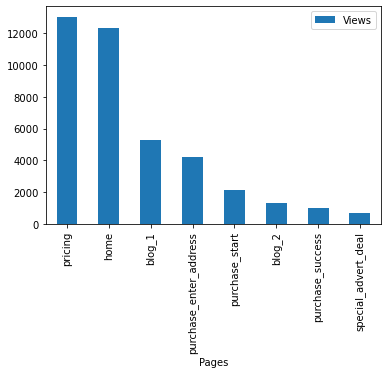

In [212]:
df.plot.bar(x='Pages', y='Views')

In [141]:
page_before_contact(mac_people).dropna().value_counts().to_frame().transpose()

pages,pricing,home,purchase_enter_address,blog_1,purchase_start,blog_2,purchase_success,special_advert_deal,contact_us
0,2362,2322,861,799,403,185,174,135,75


In [142]:
page_before_contact(windows_people).dropna().value_counts().to_frame().transpose()

pages,pricing,home,blog_1,purchase_enter_address,purchase_start,blog_2,purchase_success,special_advert_deal,contact_us
0,2324,2318,830,803,378,203,193,127,55


In [143]:
page_before_contact(ios_people).dropna().value_counts().to_frame().transpose()

pages,pricing,home,blog_1,purchase_enter_address,purchase_start,blog_2,purchase_success,special_advert_deal,contact_us
0,3528,3361,1589,935,569,426,253,127,93


How does performance of users coming via adverts compare with those that came via social media shares? 

In [144]:
# get advert vs share data from above source performance tables
df.drop(labels=[2,3], axis=0)

,Source,Bounce,Conversion,Avg Visited Pages
0,linkedin_share,0.20,0.12,4.0
1,facebook_share,0.16,0.13,4.0
4,partner_advert,0.00,0.11,5.0
5,facebook_advert,0.43,0.01,3.0
6,linkedin_advert,0.00,0.25,5.0


In [145]:
advert_people = pd.concat([linkedin_advert, facebook_advert])
share_people = pd.concat([linkedin_share, facebook_share])

In [146]:
get_dropouts(advert_people)

85.86

In [147]:
get_dropouts(share_people)

65.22

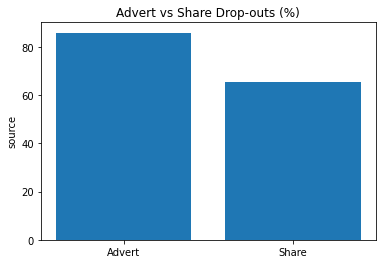

In [148]:
labels  = 'Advert' , 'Share'
dropouts = [85.86, 65.22]
plt.bar(labels, dropouts, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('source')
plt.title('Advert vs Share Drop-outs (%)')
plt.show()

In [216]:
get_conversion(advert_people)

0.05

In [217]:
get_conversion(share_people)

0.13

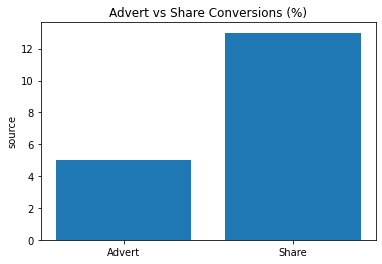

In [218]:
labels  = 'Advert' , 'Share'
dropouts = [5, 13]
plt.bar(labels, dropouts, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('source')
plt.title('Advert vs Share Conversions (%)')
plt.show()

In [149]:
ls = [advert_people, share_people]
s = ['advert', 'share']

In [150]:
bounces = []
for l in ls:
    bounces.append(get_bounce_rate(l))
bounces

[0.36, 0.17]

In [151]:
conversions = []
for l in ls:
    conversions.append(get_conversion(l))
conversions

[0.05, 0.13]

In [152]:
pages = []
for l in ls:
    pages.append(get_avg_length(l))
pages

[3.0, 4.0]

In [153]:
d4 = {'Source': s, 'Bounce': bounces, 'Conversion': conversions, 'Avg.Visited Pages': pages}
df4 = pd.DataFrame(data=d4)
df4

,Source,Bounce,Conversion,Avg.Visited Pages
0,advert,0.36,0.05,3.0
1,share,0.17,0.13,4.0


How about those who came to the site directly, or via search engine?

In [154]:
# get direct vs search data from above source performance tables
df.drop(labels=[0,1,4,5,6], axis=0)

,Source,Bounce,Conversion,Avg Visited Pages
2,search,0.18,0.15,4.0
3,direct,0.10,0.32,5.0


In [155]:
get_dropouts(direct)

21.79

In [156]:
get_dropouts(search)

58.17

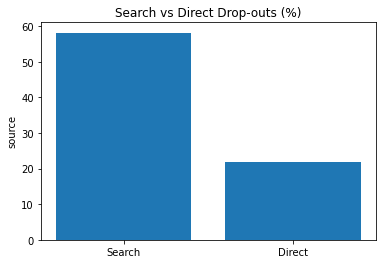

In [157]:
labels  = 'Search' , 'Direct'
dropouts = [58.17, 21.79]
plt.bar(labels, dropouts, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('source')
plt.title('Search vs Direct Drop-outs (%)')
plt.show()

In [213]:
get_conversion(direct)

0.32

In [214]:
get_conversion(search)

0.15

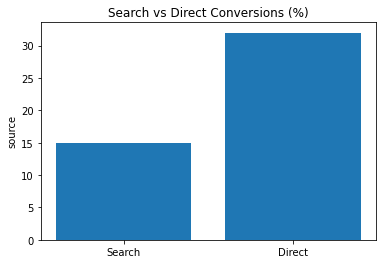

In [219]:
labels  = 'Search' , 'Direct'
converts = [15, 32]
plt.bar(labels, converts, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('source')
plt.title('Search vs Direct Conversions (%)')
plt.show()

Which blog converts better? (so that you know you should write more of similar ones in the future)

In [158]:
# blog_2 has lower exit rate take from above exit rate table
# total visits:
count = 0
for column in visitor_data.columns:
    for row in range(len(visitor_data)):
        if visitor_data[column][row] == 'blog_1':
            count += 1
count

61533

In [159]:
count = 0
for column in visitor_data.columns:
    for row in range(len(visitor_data)):
        if visitor_data[column][row] == 'blog_2':
            count += 1
count

26980

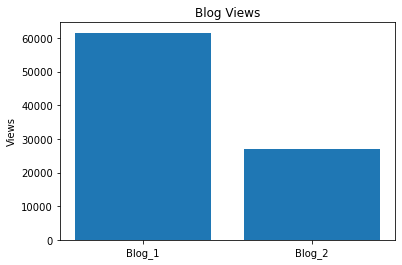

In [160]:
labels  = 'Blog_1' , 'Blog_2'
blogs = [61533, 26980]
plt.bar(labels, blogs, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('Views')
plt.title('Blog Views')
plt.show()

In [161]:
visitor_data['exit page'] = visitor_data.apply(exit_page_per_visit, axis=1)

In [162]:
blog = get_exit_rates(visitor_data).to_frame()
blog

,exit rate
contact_us,22.47
home,16.54
blog_1,14.58
pricing,14.10
purchase_success,12.01
purchase_start,8.51
purchase_enter_address,6.50
special_advert_deal,2.66
blog_2,2.63


In [163]:
blog['Page'] = blog.index

,exit rate,Page
contact_us,22.47,contact_us
home,16.54,home
blog_1,14.58,blog_1
pricing,14.10,pricing
purchase_success,12.01,purchase_success
purchase_start,8.51,purchase_start
purchase_enter_address,6.50,purchase_enter_address
special_advert_deal,2.66,special_advert_deal
blog_2,2.63,blog_2


In [222]:
blog1 = blog.loc[blog['Page'] == 'blog_1']
blog2 = blog.loc[blog['Page'] == 'blog_2']
blog = blog1.append(blog2)
blog

,exit rate,Page
blog_1,14.58,blog_1
blog_2,2.63,blog_2


<AxesSubplot:xlabel='Pages', ylabel='Exit Rate'>

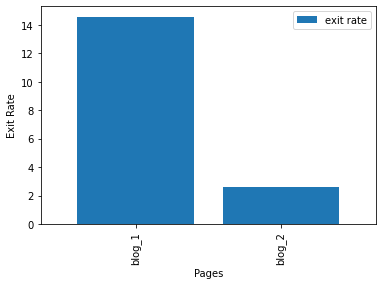

In [224]:
blog.plot(x="Page", y=["exit rate"], kind = "bar", xlabel = 'Pages', ylabel = 'Exit Rate', width=0.8)

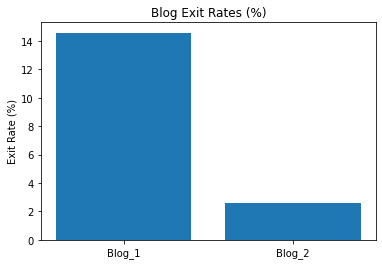

In [227]:
labels  = 'Blog_1' , 'Blog_2'
blogs = [14.58, 2.63]
plt.bar(labels, blogs, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('Exit Rate (%)')
plt.title('Blog Exit Rates (%)')
plt.show()

In [165]:
rows = list(range(0,len(visitor_data)))
visitor_data['Blog_1'] = 0
visitor_data['Blog_2'] = 0
visitor_data.head()

,source,platform,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,exit page,Blog_1,Blog_2
0,linkedin_share,android,blog_1,home,pricing,purchase_start,purchase_enter_address,purchase_success,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,purchase_success,0,0
1,facebook_share,ios,blog_1,pricing,purchase_start,blog_1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,0,0
2,search,android,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,0,0
3,facebook_share,windows,blog_2,home,blog_1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,0,0
4,facebook_share,ios,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,0,0


In [228]:
for column in visitor_data.columns:
    for row in range(len(visitor_data)):
        if visitor_data[column][row] == 'blog_1':
            visitor_data['Blog_1'][row] = 1

<ipython-input-228-ff5e38064591>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data['Blog_1'][row] = 1


In [230]:
for column in visitor_data.columns:
    for row in range(len(visitor_data)):
        if visitor_data[column][row] == 'blog_2':
            visitor_data['Blog_2'][row] = 1

<ipython-input-230-5939b44b525d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor_data['Blog_2'][row] = 1


In [231]:
visitor_data['blog_check'] = visitor_data['Blog_1'] + visitor_data['Blog_2']

In [232]:
visitor_data.head()

,source,platform,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,exit page,Blog_1,Blog_2,blog_check
0,linkedin_share,android,blog_1,home,pricing,purchase_start,purchase_enter_address,purchase_success,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,purchase_success,1,0,1
1,facebook_share,ios,blog_1,pricing,purchase_start,blog_1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,1,0,1
2,search,android,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,1,0,1
3,facebook_share,windows,blog_2,home,blog_1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,1,1,2
4,facebook_share,ios,home,blog_1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,blog_1,1,0,1


In [233]:
blog_data = visitor_data.loc[visitor_data['blog_check'] == 1]

In [234]:
blog_1 = blog_data.loc[blog_data['Blog_1'] == 1]
blog_2 = blog_data.loc[blog_data['Blog_2'] == 1]

In [235]:
get_conversion(blog_1)

0.16

In [236]:
get_conversion(blog_2)

0.3

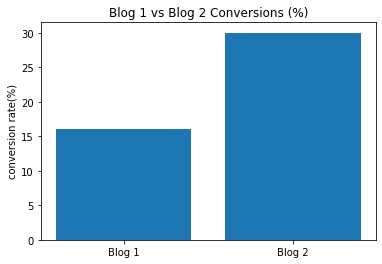

In [238]:
labels  = 'Blog 1' , 'Blog 2'
conversions = [16, 30]
plt.bar(labels, conversions, align='center',width=0.8)
plt.xticks(labels)
plt.ylabel('conversion rate(%)')
plt.title('Blog 1 vs Blog 2 Conversions (%)')
plt.show()